<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-9-10.5" data-toc-modified-id="Exercise-9-10.5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 9-10.5</a></span><ul class="toc-item"><li><span><a href="#Comments:" data-toc-modified-id="Comments:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Comments:</a></span><ul class="toc-item"><li><span><a href="#Example:" data-toc-modified-id="Example:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Example:</a></span></li></ul></li></ul></li></ul></div>

# Exercise 9-10.5

The return associated with asset $i$ at date $t$ and the market return at date $t$ are denoted respectively $r_{it}$ and $r_{Mt}$. The difference between the return of a Baa Bonds portfolio (Moody's rating) and the risk-free rate is denoted $r_{Baa_t}$. The risk-free rate is denoted $r_f$.

In a first step, quantitative analysts have estimated $\alpha_i$, $\beta_{i1}$, and $\beta_{i2}$ for each asset $i$, where $i = 1, \ldots, N$, using a classical Ordinary Least Squares (OLS) regression:

$ r_{i,t} = \alpha_i + \beta_{i, 1} r_{M, t} + \beta_{i, 2} r_{Baa, t} + \varepsilon_{i,t} \tag 1 $

In a second step, they have estimated parameters $\lambda_M$ and $\lambda_{Baa}$ where:

$ \bar{r}_i = \alpha + \lambda_M \hat \beta_{i, 1} + \lambda_{Baa} \hat \beta_{i,2} + \varepsilon_{i} \tag 2 $

Here, $\bar{r}_i$ is the average of the returns associated with asset $i$.

Quantitative analysts have found that $\lambda_{Baa}$ is, from a statistical point of view, significantly different from 0.

## Comments:

1. Regression (1) is a model of the **variance** of the assets. The $\beta$ coefficients explain how much variance in the time series of returns is explained by variance in the risk factors, in this case the market factor and exposure to the BAA bond portfolio.

2. Regression (2) is an **asset pricing model**, because it models the mean of asset returns. This is what we are actually interested in. The $\lambda$ coefficients give the _risk premium_ for each risk factor. That is, given exposure to the market, how much expected return is demanded by investors?

**EXTREMELY IMPORTANT**: The statistical significant of $\beta$ and $\lambda$ are **NOT** tests of the **ASSET PRICING MODEL**. The only test of the asset pricing model is that all of the errors $\varepsilon_{i} = 0$, JOINTLY. 

- Annoying notation warning: If you look up this theory e.g. in Cochrane (2001), you will find that the $\varepsilon_i$ in regression 2 are called $\alpha_i$, and the $\alpha$ in our regression here is either forced to be zero or called $\gamma$. This literature is horrible. You have been warned.

The core question for an asset pricing model is "can this model be used to price other assets?". 
- Statistical tests of $\beta$ ask, "how much of the variance in the time series of asset $i$ is explained by variance in the risk factor?". This is not the right question!
- Statistical tests of $\lambda$ ask, "Is the factor priced?". This is also not the same question!

All of this stems from the fact that the factors might be (ARE!) correlated. 

### Example:

Suppose the CAPM holds 100%. We fit a multifactor model with 2 factors, the market and a "Microsoft factor":

$$\tilde r_{i,t} = \alpha_i + \beta_{i,1} \tilde r_{m,t} + \beta_2 \tilde r_{MSFT, t} + \varepsilon_{i,t}$$

- Will $\beta_2$ be significant? Almost certainly, becase 

In [84]:
import pymc as pm
import pandas as pd
from string import ascii_uppercase

def make_stock_name(rng):
    n_letters = rng.choice([1, 2, 3, 4], p=[0.05, 0.25, 0.3, 0.4])
    name = ''.join(rng.choice(list(ascii_uppercase), replace=True, size=n_letters))
    return name

market_size = 100
while True:
    stocks = [make_stock_name(rng) for _ in range(market_size)]
    if len(set(stocks)) == len(stocks):
        break
coords = {'date':pd.date_range(start='2000-01-01', end='2020-01-01', freq='B'),
          'stock':stocks}
with pm.Model(coords=coords) as capm_model:
    
    

In [61]:
# Test the CAPM for stock 0
import statsmodels.api as sm
mod = sm.OLS((capm_returns[:, 0] - rf), np.c_[sm.add_constant(market_returns - rf), (capm_returns[:, 22] - rf)], hasconst=True)
res = mod.fit()
res.summary(yname='Returns 0', xname=['α', 'Market β', 'β_10'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Returns 0   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9970
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.370
Time:                        11:56:13   Log-Likelihood:                -1430.3
No. Observations:                 500   AIC:                             2867.
Df Residuals:                     497   BIC:                             2879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
α             -0.1053      0.210     -0.501      0.616      -0.518       0.308
Market β      12.9131      9.479      1.362      0.174      -5.710      31.537
β_10          -0.0168      0.038     -0.438      0.661      -0.092       0.058
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.597
Skew:                          -0.010   Prob(JB):                        0.742
Kurtosis:                       2.832   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

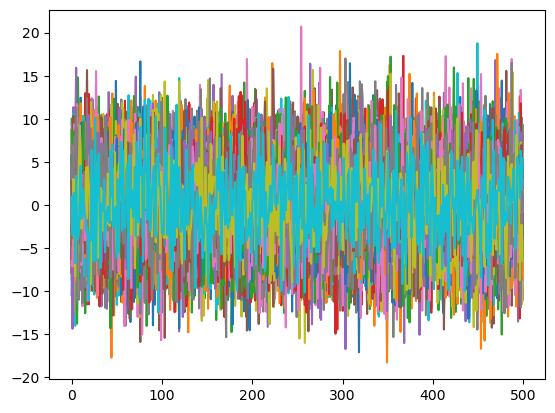

In [62]:
import matplotlib.pyplot as plt

plt.plot(capm_returns);